<a href="https://colab.research.google.com/github/M-H-Amini/MachineLearning-TMU/blob/master/MLe_TMU_Lec8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In The Name Of ALLAH
# Machine Learning *elementary* Course
## Tarbiat Modares University
### Mohammad Hossein Amini (mhamini@aut.ac.ir)
# Lecture 8

<img src="https://drive.google.com/uc?id=144SDpgv7EEy6Og1ZFNIv_nBaugKGiSCE" width="400">



Let's experiment a little bit with neural networks.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense
from keras.models import Sequential

#  Sinusoidal Example

$y = sin(\frac{\pi}{4}x)$

(21, 1) (21, 1)


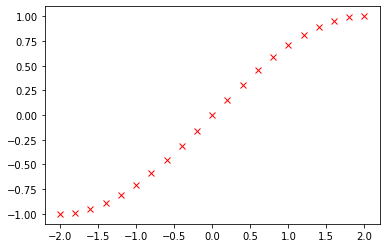

In [7]:
X = np.linspace(-2, 2, 21)[:, np.newaxis]
y = np.sin(X * np.pi / 4)

print(X.shape, y.shape)

plt.figure()
plt.plot(X, y, 'rx')
plt.show()

In [14]:
model = Sequential()
model.add(Dense(4, activation='sigmoid', input_shape=(1,)))
model.add(Dense(1, activation='linear'))
# model.summary()

In [16]:
model.compile(optimizer='adam', loss='mse')

In [19]:
model.fit(X, y, batch_size=4, epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 11/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 12/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 13/100
6/6 [==============================] - 0s 1ms/st

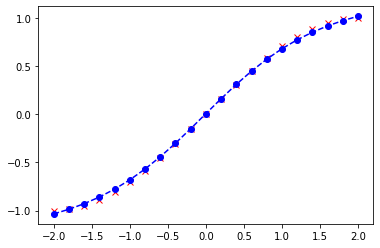

In [22]:
output = model.predict(X)
plt.figure()
plt.plot(X, y, 'rx', X, output, 'b--o')
plt.show()

In [23]:
print(model.weights)

[<tf.Variable 'dense_4/kernel:0' shape=(1, 4) dtype=float32, numpy=
array([[-1.5331733 ,  1.1194304 ,  0.43322155,  0.5206658 ]],
      dtype=float32)>, <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([-0.02804528,  0.03677338, -0.11470403,  0.08307421], dtype=float32)>, <tf.Variable 'dense_5/kernel:0' shape=(4, 1) dtype=float32, numpy=
array([[-1.4453373 ],
       [ 0.49334052],
       [ 0.05352083],
       [ 0.6703892 ]], dtype=float32)>, <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([0.09420814], dtype=float32)>]


#  MNIST

In [25]:
from keras.datasets.mnist import load_data

In [32]:
(Xtrain, ytrain), (Xtest, ytest) = load_data()
print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


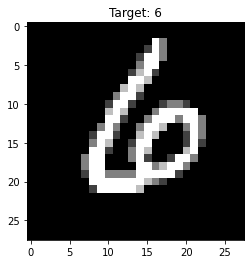

In [40]:
def show(X, y, index=0):
  plt.figure()
  plt.imshow(X[index], cmap='gray')
  plt.title('Target: {}'.format(y[index]))
  plt.show()

show(Xtrain, ytrain, 83)

In [54]:
Xtrain_vec = np.reshape(Xtrain, (60000, -1))
Xtest_vec = np.reshape(Xtest, (10000, -1))
# ytrain_vec = np.zeros((60000, 10))
# ytest_vec = np.zeros((10000, 10))
# ytrain_vec[np.arange(60000), ytrain] = 1
# ytest_vec[np.arange(10000), ytest] = 1

In [58]:
model = Sequential()
model.add(Dense(16, activation='sigmoid', input_shape=(28*28, )))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                90        
Total params: 12,786
Trainable params: 12,786
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
model.fit(Xtrain_vec, ytrain, batch_size=32, epochs=20, validation_data=(Xtest_vec, ytest))

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5742 - accuracy: 0.5265 - val_loss: 1.0548 - val_accuracy: 0.6950
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9266 - accuracy: 0.7161 - val_loss: 0.8009 - val_accuracy: 0.7437
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7605 - accuracy: 0.7655 - val_loss: 0.6812 - val_accuracy: 0.8023
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6934 - accuracy: 0.7898 - val_loss: 0.6518 - val_accuracy: 0.7984
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6389 - accuracy: 0.8087 - val_loss: 0.6385 - val_accuracy: 0.8067
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6016 - accuracy: 0.8198 - val_loss: 0.5990 - val_accuracy: 0.8245
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5760 - accuracy: 0.8303 - val_loss: 0.5411 - val_accuracy: